# Regression in Python

***
This is a very quick run-through of some basic statistical concepts, adapted from [Lab 4 in Harvard's CS109](https://github.com/cs109/2015lab4) course. Please feel free to try the original lab if you're feeling ambitious :-) The CS109 git repository also has the solutions if you're stuck.

* Linear Regression Models
* Prediction using linear regression

Linear regression is used to model and predict continuous outcomes with normal random errors. There are nearly an infinite number of different types of regression models and each regression model is typically defined by the distribution of the prediction errors (called "residuals") of the type of data. Logistic regression is used to model binary outcomes whereas Poisson regression is used to predict counts. In this exercise, we'll see some examples of linear regression as well as Train-test splits.

The packages we'll cover are: `statsmodels`, `seaborn`, and `scikit-learn`. While we don't explicitly teach `statsmodels` and `seaborn` in the Springboard workshop, those are great libraries to know.
***

<img width=600 height=300 src="https://imgs.xkcd.com/comics/sustainable.png"/>
***

In [1]:
# special IPython command to prepare the notebook for matplotlib and other libraries
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

import seaborn as sns

# special matplotlib argument for improved plots
from matplotlib import rcParams
sns.set_style("whitegrid")
#sns.set_context("poster")


***
# Part 1: Introduction to Linear Regression
### Purpose of linear regression
***
<div class="span5 alert alert-info">

<p> Given a dataset containing predictor variables $X$ and outcome/response variable $Y$, linear regression can be used to: </p>
<ul>
  <li> Build a <b>predictive model</b> to predict future values of $\hat{Y}$, using new data $X^*$ where $Y$ is unknown.</li>
  <li> Model the <b>strength of the relationship</b> between each independent variable $X_i$ and $Y$</li>
    <ul>
      <li> Many times, only a subset of independent variables $X_i$ will have a linear relationship with $Y$</li>
      <li> Need to figure out which $X_i$ contributes most information to predict $Y$ </li>
    </ul>
   <li>It is in many cases, the first pass prediction algorithm for continuous outcomes. </li>
</ul>
</div>

### A Brief Mathematical Recap
***

[Linear Regression](http://en.wikipedia.org/wiki/Linear_regression) is a method to model the relationship between a set of independent variables $X$ (also knowns as explanatory variables, features, predictors) and a dependent variable $Y$.  This method assumes the relationship between each predictor $X$ is **linearly** related to the dependent variable $Y$. The most basic linear regression model contains one independent variable $X$, we'll call this the simple model. 

$$ Y = \beta_0 + \beta_1 X + \epsilon$$

where $\epsilon$ is considered as an unobservable random variable that adds noise to the linear relationship. In linear regression, $\epsilon$ is assumed to be normally distributed with a mean of 0. In other words, what this means is that on average, if we know $Y$, a roughly equal number of predictions $\hat{Y}$ will be above $Y$ and others will be below $Y$. That is, on average, the error is zero. The residuals, $\epsilon$ are also assumed to be "i.i.d.": independently and identically distributed. Independence means that the residuals are not correlated -- the residual from one prediction has no effect on the residual from another prediction. Correlated errors are common in time series analysis and spatial analyses.

* $\beta_0$ is the intercept of the linear model and represents the average of $Y$ when all independent variables $X$ are set to 0.

* $\beta_1$ is the slope of the line associated with the regression model and represents the average effect of a one-unit increase in $X$ on $Y$.

* Back to the simple model. The model in linear regression is the *conditional mean* of $Y$ given the values in $X$ is expressed a linear function.  

$$ y = f(x) = E(Y | X = x)$$ 

![conditional mean](images/conditionalmean.png)
*Image from http://www.learner.org/courses/againstallodds/about/glossary.html. Note this image uses $\alpha$ and $\beta$ instead of $\beta_0$ and $\beta_1$.*

* The goal is to estimate the coefficients (e.g. $\beta_0$ and $\beta_1$). We represent the estimates of the coefficients with a "hat" on top of the letter.  

$$ \hat{\beta}_0, \hat{\beta}_1 $$

* Once we estimate the coefficients $\hat{\beta}_0$ and $\hat{\beta}_1$, we can use these to predict new values of $Y$ given new data $X$.

$$\hat{y} = \hat{\beta}_0 + \hat{\beta}_1 x_1$$

* Multiple linear regression is when you have more than one independent variable and the estimation involves matrices
    * $X_1$, $X_2$, $X_3$, $\ldots$


* How do you estimate the coefficients? 
    * There are many ways to fit a linear regression model
    * The method called **least squares** is the most common methods
    * We will discuss least squares

$$ Y = \beta_0 + \beta_1 X_1 + \ldots + \beta_p X_p + \epsilon$$ 
    
### Estimating $\hat\beta$: Least squares
***
[Least squares](http://en.wikipedia.org/wiki/Least_squares) is a method that can estimate the coefficients of a linear model by minimizing the squared residuals: 

$$ \mathscr{L} = \sum_{i=1}^N \epsilon_i^2 = \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2  = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

where $N$ is the number of observations and $\epsilon$ represents a residual or error, ACTUAL - PREDICTED.  

#### Estimating the intercept $\hat{\beta_0}$ for the simple linear model

We want to minimize the squared residuals and solve for $\hat{\beta_0}$ so we take the partial derivative of $\mathscr{L}$ with respect to $\hat{\beta_0}$ 

$
\begin{align}
\frac{\partial \mathscr{L}}{\partial \hat{\beta_0}} &= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \epsilon^2 \\
&= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2 \\
&= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)^2 \\
&= -2 \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \hspace{25mm} \mbox{(by chain rule)} \\
&= -2 \sum_{i=1}^N (y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i) \\
&= -2 \left[ \left( \sum_{i=1}^N y_i \right) - N \hat{\beta_0} - \hat{\beta}_1 \left( \sum_{i=1}^N x_i
\right) \right] \\
& 2 \left[ N \hat{\beta}_0 + \hat{\beta}_1 \sum_{i=1}^N x_i - \sum_{i=1}^N y_i \right] = 0 \hspace{20mm} \mbox{(Set equal to 0 and solve for $\hat{\beta}_0$)} \\
& N \hat{\beta}_0 + \hat{\beta}_1 \sum_{i=1}^N x_i - \sum_{i=1}^N y_i = 0 \\
& N \hat{\beta}_0 = \sum_{i=1}^N y_i - \hat{\beta}_1 \sum_{i=1}^N x_i \\
& \hat{\beta}_0 = \frac{\sum_{i=1}^N y_i - \hat{\beta}_1 \sum_{i=1}^N x_i}{N} \\
& \hat{\beta}_0 = \frac{\sum_{i=1}^N y_i}{N} - \hat{\beta}_1 \frac{\sum_{i=1}^N x_i}{N} \\
& \boxed{\hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x}}
\end{align}
$

Using this new information, we can compute the estimate for $\hat{\beta}_1$ by taking the partial derivative of $\mathscr{L}$ with respect to $\hat{\beta}_1$.

$
\begin{align}
\frac{\partial \mathscr{L}}{\partial \hat{\beta_1}} &= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \epsilon^2 \\
&= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2 \\
&= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)^2 \\
&= 2 \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \left( -x_i \right) \hspace{25mm}\mbox{(by chain rule)} \\
&= -2 \sum_{i=1}^N x_i \left( y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i \right) \\
&= -2 \sum_{i=1}^N x_i (y_i - \hat{\beta}_0 x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \sum_{i=1}^N x_i (y_i - \left( \bar{y} - \hat{\beta}_1 \bar{x} \right) x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \sum_{i=1}^N (x_i y_i - \bar{y}x_i + \hat{\beta}_1\bar{x}x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \left[ \sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i + \hat{\beta}_1\bar{x}\sum_{i=1}^N x_i - \hat{\beta}_1 \sum_{i=1}^N x_i^2 \right] \\
&= -2 \left[ \hat{\beta}_1 \left\{ \bar{x} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i^2 \right\} + \left\{ \sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i \right\}\right] \\
& 2 \left[ \hat{\beta}_1 \left\{ \sum_{i=1}^N x_i^2 - \bar{x} \sum_{i=1}^N x_i \right\} + \left\{ \bar{y} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i y_i \right\} \right] = 0 \\
& \hat{\beta}_1 = \frac{-\left( \bar{y} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i y_i \right)}{\sum_{i=1}^N x_i^2 - \bar{x}\sum_{i=1}^N x_i} \\
&= \frac{\sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i}{\sum_{i=1}^N x_i^2 - \bar{x} \sum_{i=1}^N x_i} \\
& \boxed{\hat{\beta}_1 = \frac{\sum_{i=1}^N x_i y_i - \bar{x}\bar{y}n}{\sum_{i=1}^N x_i^2 - n \bar{x}^2}}
\end{align}
$

The solution can be written in compact matrix notation as

$$\hat\beta =  (X^T X)^{-1}X^T Y$$ 

We wanted to show you this in case you remember linear algebra, in order for this solution to exist we need $X^T X$ to be invertible. Of course this requires a few extra assumptions, $X$ must be full rank so that $X^T X$ is invertible, etc. Basically, $X^T X$ is full rank if all rows and columns are linearly independent. This has a loose relationship to variables and observations being independent respective. **This is important for us because this means that having redundant features in our regression models will lead to poorly fitting (and unstable) models.** We'll see an implementation of this in the extra linear regression example.

***
# Part 2: Exploratory Data Analysis for Linear Relationships

The [Boston Housing data set](https://archive.ics.uci.edu/ml/datasets/Housing) contains information about the housing values in suburbs of Boston.  This dataset was originally taken from the StatLib library which is maintained at Carnegie Mellon University and is now available on the UCI Machine Learning Repository. 


## Load the Boston Housing data set from `sklearn`
***

This data set is available in the [sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston) python module which is how we will access it today.  

In [2]:
from sklearn.datasets import load_boston
import pandas as pd

boston = load_boston()

In [3]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [4]:
boston.data.shape

(506, 13)

In [5]:
# Print column names
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [6]:
# Print description of Boston housing data set
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Now let's explore the data set itself. 

In [7]:
bos = pd.DataFrame(boston.data)
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


There are no column names in the DataFrame. Let's add those. 

In [8]:
bos.columns = boston.feature_names
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Now we have a pandas DataFrame called `bos` containing all the data we want to use to predict Boston Housing prices.  Let's create a variable called `PRICE` which will contain the prices. This information is contained in the `target` data. 

In [9]:
print(boston.target.shape)

(506,)


In [10]:
bos['PRICE'] = boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## EDA and Summary Statistics
***

Let's explore this data set.  First we use `describe()` to get basic summary statistics for each of the columns. 

In [11]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Scatterplots
***

Let's look at some scatter plots for three variables: 'CRIM' (per capita crime rate), 'RM' (number of rooms) and 'PTRATIO' (pupil-to-teacher ratio in schools).  

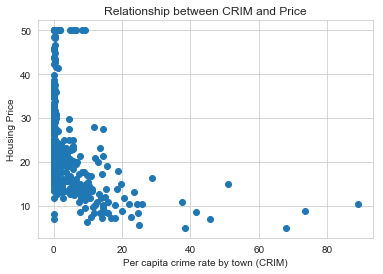

In [12]:
_ = plt.scatter(bos.CRIM, bos.PRICE)
_ = plt.xlabel("Per capita crime rate by town (CRIM)")
_ = plt.ylabel("Housing Price")
_ = plt.title("Relationship between CRIM and Price")

<div class="span5 alert alert-info">
<h3>Part 2 Checkup Exercise Set I</h3>

<p><b>Exercise:</b> What kind of relationship do you see? e.g. positive, negative?  linear? non-linear? Is there anything else strange or interesting about the data? What about outliers?</p>


<p><b>Exercise:</b> Create scatter plots between *RM* and *PRICE*, and *PTRATIO* and *PRICE*. Label your axes appropriately using human readable labels. Tell a story about what you see.</p>

<p><b>Exercise:</b> What are some other numeric variables of interest? Why do you think they are interesting? Plot scatterplots with these variables and *PRICE* (house price) and tell a story about what you see.</p>

</div>

#### Exercise: What kind of relationship do you see? e.g. positive, negative? linear? non-linear? Is there anything else strange or interesting about the data? What about outliers?

Relation is negative and not linear. Prices in general tends to reduce with the increment of crime rate, but there are outliers after of crime rate > 30. We looking for outliers in the per capita crime rate using a boxplot:

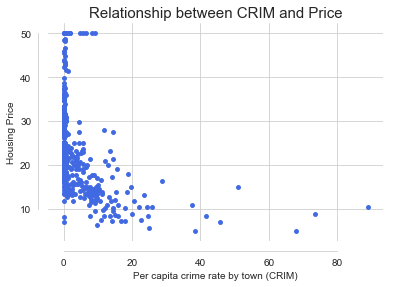

In [13]:
_ = plt.scatter(bos.CRIM, bos.PRICE, s=15, color='royalblue')
_ = plt.xlabel("Per capita crime rate by town (CRIM)")
_ = plt.ylabel("Housing Price")
_ = plt.title("Relationship between CRIM and Price", size=15)
_ = sns.despine(offset=10, trim=True)

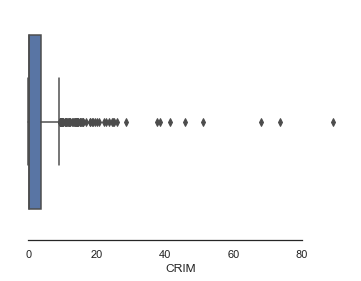

In [14]:
_ = sns.set(style="white")
_ = sns.boxplot(x="CRIM",data=bos)
_ = sns.despine(offset=10, trim=True)

Then, we measure z score of all dataframe and we drop z scores more than 3:

In [15]:
z = np.abs(stats.zscore(bos.CRIM))
z_price = bos.PRICE[(z < 3)]
z_crime = bos.CRIM[(z < 3)]

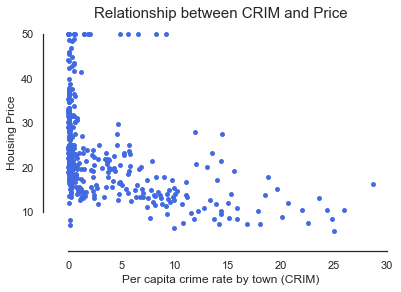

In [16]:
_ = plt.scatter(z_crime, z_price, s=15, color='royalblue')
_ = plt.xlabel("Per capita crime rate by town (CRIM)")
_ = plt.ylabel("Housing Price")
_ = plt.title("Relationship between CRIM and Price", size=15)
_ = sns.despine(offset=10, trim=True)

And now, we have the same scatter plot, but in a more appropiate range. We can see a high concentration of data in lowest crime rates with the prices varying between 10 and 50 thousand of dollars. There is a trend to decrease the housing prices range meanwhile the crime rate increase. It suggests a negative relation between de data. It's probably that some points between 5% and 10% of houses that still means 50 thousand of dollars are a negative influence in the effort to fit a precise model. 

#### Exercise: Create scatter plots between *RM* and *PRICE*, and *PTRATIO* and *PRICE*. Label your axes appropriately using human readable labels. Tell a story about what you see.

### How much are you willing to pay for a house?

Neighborhood, nearness to schools, security, number of rooms, presence of retail business, access to the public transportation are just a couple of factors to consider when you are looking for a new home.

Next graph display the scatter plot to housing price and average number of rooms in Boston, 1987. We can apprecite a positive and strong correlation between both variables and a considerable concentration of data between 5 and 7 rooms. Conserving all the others conditions statics, a house with 8 rooms today, in Boston, would cost 50.000 in 1987 or 113.68 thousand of dollars now, considering that dollar had an average inflation rate of 2.57% per year during the period 1987-2019. We know that today housing prices is more expensive than that, especially in the most popular metropolitan areas in US.

In [17]:
bos[bos.RM>=8].groupby('RM').mean().head()

,CRIM,ZN,INDUS,CHAS,NOX,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
RM,,,,,,,,,,,,,
8.034,0.02009,95.0,2.68,0.0,0.4161,31.9,5.1180,4.0,224.0,14.7,390.55,2.88,50.0
8.040,0.38214,0.0,6.20,0.0,0.5040,86.5,3.2157,8.0,307.0,17.4,387.38,3.13,37.6
8.069,0.12083,0.0,2.89,0.0,0.4450,76.0,3.4952,2.0,276.0,18.0,396.90,4.21,38.7
8.247,0.33147,0.0,6.20,0.0,0.5070,70.4,3.6519,8.0,307.0,17.4,378.95,3.95,48.3
8.259,0.36894,22.0,5.86,0.0,0.4310,8.4,8.9067,7.0,330.0,19.1,396.90,3.54,42.8


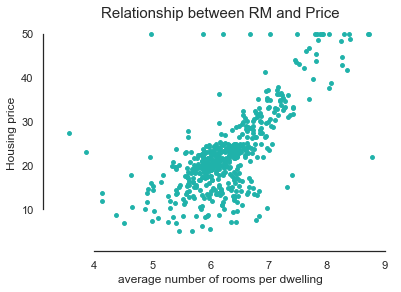

In [18]:
_ = plt.scatter(bos.RM, bos.PRICE, s=15, color='lightseagreen')
_ = plt.xlabel('average number of rooms per dwelling')
_ = plt.ylabel('Housing price')
_ = plt.title("Relationship between RM and Price", size=15)
_ = sns.despine(offset=10, trim=True)

Access to schools is another the esential element to consider when you are thinking to move somewhere else. Additionally, there is evidence about the improvement of learning in small classrooms, when teachers can focuse their attention in less students. That is a kind of privilege associated with more expenses places on the cities. The scatterplot below is showing the relation between the housing price and pupil-teacher ratio in Boston, 1987 and surprisingly, there are not clear trends: almost all data is between 14 and 20 students and the housing prices vary among 10 and 50. Data could be including rural areas, where classrooms are small too. Also, we note an interesting observation: in the inferior range, less than 14 pupils per teacher, we can observe an increase on the housing prices; instead, more than 20 implies less price. For a PTRATIO of 13, keeping all another variables and being affected only for a average inflation rate of 2.57%, the mean housing price today would be $85.48 thousand of dollars.

In [19]:
bos[bos.PTRATIO<=13].groupby('PTRATIO').mean()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,B,LSTAT,PRICE
PTRATIO,,,,,,,,,,,,,
12.6,0.041483,80.0,1.52,0.0,0.404,7.222667,36.333333,7.30900,2.0,329.0,381.136667,6.436667,32.733333
13.0,0.630630,20.0,3.97,0.0,0.635,7.406167,83.558333,2.13905,5.0,264.0,388.797500,8.146667,38.025000


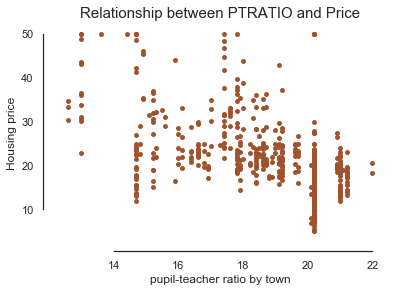

In [20]:
_ = plt.scatter(bos.PTRATIO, bos.PRICE, s=15, color='sienna')
_ = plt.xlabel('pupil-teacher ratio by town')
_ = plt.ylabel('Housing price')
_ = plt.title("Relationship between PTRATIO and Price", size=15)
_ = sns.despine(offset=10, trim=True)

#### Exercise: What are some other numeric variables of interest? Why do you think they are interesting? Plot scatterplots with these variables and *PRICE* (house price) and tell a story about what you see.

We use the Pearson coefficient to measure the relationship between all variables with the housing prices.

In [21]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x,y)
    # Return entry [0,1]
    return corr_mat[0,1]

In [22]:
print ('Pearson coefficient between ZN and PRICE = %.3f' %(pearson_r(bos.ZN, bos.PRICE)))
print ('Pearson coefficient between INDUS and PRICE = %.3f' %(pearson_r(bos.INDUS, bos.PRICE)))
print ('Pearson coefficient between CHAS and PRICE = %.3f' %(pearson_r(bos.CHAS, bos.PRICE)))
print ('Pearson coefficient between NOX and PRICE = %.3f' %(pearson_r(bos.NOX, bos.PRICE)))
print ('Pearson coefficient between AGE and PRICE = %.3f' %(pearson_r(bos.AGE, bos.PRICE)))
print ('Pearson coefficient between DIS and PRICE = %.3f' %(pearson_r(bos.DIS, bos.PRICE)))
print ('Pearson coefficient between RAD and PRICE = %.3f' %(pearson_r(bos.RAD, bos.PRICE)))
print ('Pearson coefficient between TAX and PRICE = %.3f' %(pearson_r(bos.TAX, bos.PRICE)))
print ('Pearson coefficient between B and PRICE = %.3f' %(pearson_r(bos.B, bos.PRICE)))
print ('Pearson coefficient between LSTAT and PRICE = %.3f' %(pearson_r(bos.LSTAT, bos.PRICE)))

Pearson coefficient between ZN and PRICE = 0.360
Pearson coefficient between INDUS and PRICE = -0.484
Pearson coefficient between CHAS and PRICE = 0.175
Pearson coefficient between NOX and PRICE = -0.427
Pearson coefficient between AGE and PRICE = -0.377
Pearson coefficient between DIS and PRICE = 0.250
Pearson coefficient between RAD and PRICE = -0.382
Pearson coefficient between TAX and PRICE = -0.469
Pearson coefficient between B and PRICE = 0.333
Pearson coefficient between LSTAT and PRICE = -0.738


And a strong inverse relation between the housing price and porcentage of lower status of the population was founded, as we could suspect. Lower status of the population has less chance to live in expensive neighborhoods.

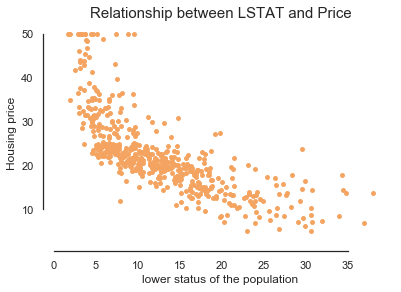

In [23]:
_ = plt.scatter(bos.LSTAT, bos.PRICE, s=15, color='sandybrown')
_ = plt.xlabel('lower status of the population')
_ = plt.ylabel('Housing price')
_ = plt.title("Relationship between LSTAT and Price", size=15)
_ = sns.despine(offset=10, trim=True)

We find 1.73% and 37.97% as the minimum and maximum percentages of lower status, respectively. The difference housing prices was 36.03 thousand of dollars in 1987. Today, only considering only the average inflation rate, it would be $81.22.

### Scatterplots using Seaborn
***

[Seaborn](https://stanford.edu/~mwaskom/software/seaborn/) is a cool Python plotting library built on top of matplotlib. It provides convenient syntax and shortcuts for many common types of plots, along with better-looking defaults.

We can also use [seaborn regplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/regression.html#functions-to-draw-linear-regression-models) for the scatterplot above. This provides automatic linear regression fits (useful for data exploration later on). Here's one example below.

/Users/daniela/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


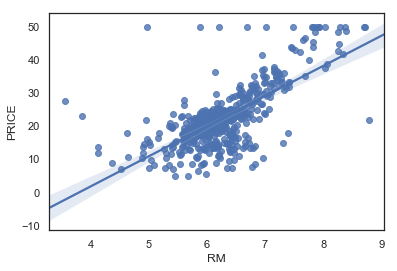

In [24]:
sns.regplot(y="PRICE", x="RM", data=bos, fit_reg = True)

### Histograms
***


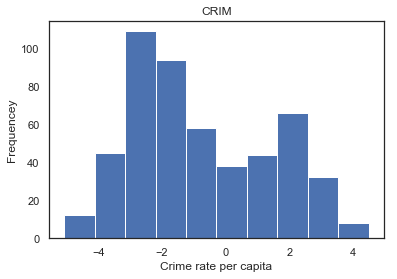

In [25]:
plt.hist(np.log(bos.CRIM))
plt.title("CRIM")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequencey")
plt.show()

<div class="span5 alert alert-info">
<h3>Part 2 Checkup Exercise Set II</h3>

<p><b>Exercise:</b> In the above histogram, we took the logarithm of the crime rate per capita. Repeat this histogram without taking the log. What was the purpose of taking the log? What do we gain by making this transformation? What do you now notice about this variable that is not obvious without making the transformation?

<p><b>Exercise:</b> Plot the histogram for *RM* and *PTRATIO* against each other, along with the two variables you picked in the previous section. We are looking for correlations in predictors here.</p>
</div>

#### Exercise: In the above histogram, we took the logarithm of the crime rate per capita. Repeat this histogram without taking the log. What was the purpose of taking the log? What do we gain by making this transformation? What do you now notice about this variable that is not obvious without making the transformation?

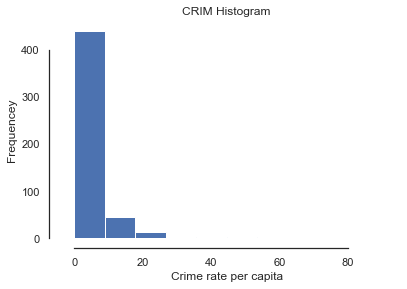

In [26]:
_ = plt.hist(bos.CRIM, bins=10)
_ = plt.title("CRIM Histogram")
_ = plt.xlabel("Crime rate per capita")
_ = plt.ylabel("Frequencey")
_ = sns.despine(offset=10, trim=True)

We choose 10 bins and we just see data until the third bin. There is a dense concentration of data with a rate close to zero and a couple of data between 40-80 crime rate. The range is huge, but distribution is skewed and using a log scale allow us to inspect more easily the dense cloud and don't lose other portions of information.

#### Exercise: Plot the histogram for *RM* and *PTRATIO* against each other, along with the two variables you picked in the previous section. We are looking for correlations in predictors here.

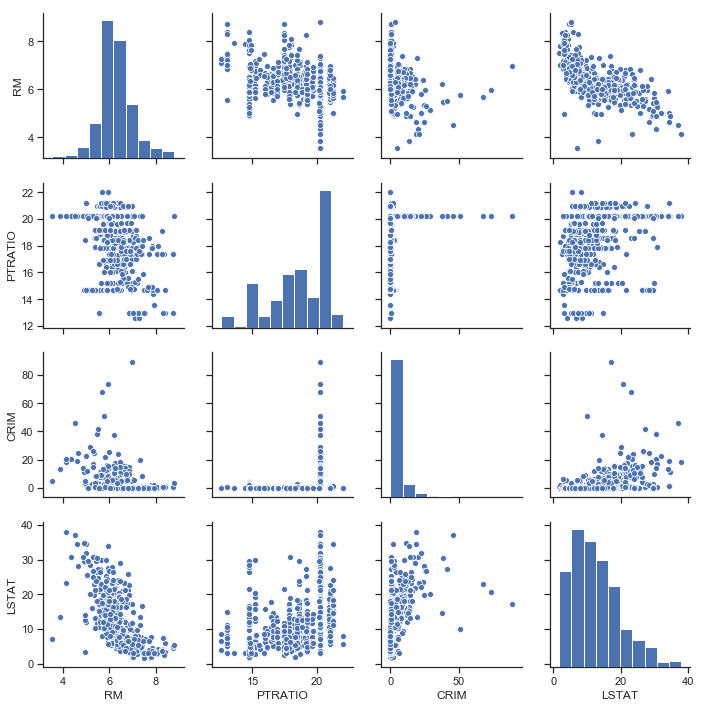

In [27]:
sns.set(style="ticks")
sns.pairplot(bos, vars=['RM', 'PTRATIO', 'CRIM', 'LSTAT'])

The plot above suggests relationship between some variables: `RM` and `LSTAT`, `CRIM` and `LSTAT`. Pearson correlation between them indicates that there is correlation between the variables. Then, we can’t put them together to fit the model, because we need variables independents.

In [28]:
print ('Pearson coefficient between RM and LSTAT = %.3f' %(pearson_r(bos.RM, bos.LSTAT)))
print ('Pearson coefficient between CRIM and LSTAT = %.3f' %(pearson_r(bos.CRIM, bos.LSTAT)))

Pearson coefficient between RM and LSTAT = -0.614
Pearson coefficient between CRIM and LSTAT = 0.456


## Part 3: Linear Regression with Boston Housing Data Example
***

Here, 

$Y$ = boston housing prices (called "target" data in python, and referred to as the dependent variable or response variable)

and

$X$ = all the other features (or independent variables, predictors or explanatory variables)

which we will use to fit a linear regression model and predict Boston housing prices. We will use the least-squares method to estimate the coefficients.  

We'll use two ways of fitting a linear regression. We recommend the first but the second is also powerful in its features.

### Fitting Linear Regression using `statsmodels`
***
[Statsmodels](http://statsmodels.sourceforge.net/) is a great Python library for a lot of basic and inferential statistics. It also provides basic regression functions using an R-like syntax, so it's commonly used by statisticians. While we don't cover statsmodels officially in the Data Science Intensive workshop, it's a good library to have in your toolbox. Here's a quick example of what you could do with it. The version of least-squares we will use in statsmodels is called *ordinary least-squares (OLS)*. There are many other versions of least-squares such as [partial least squares (PLS)](https://en.wikipedia.org/wiki/Partial_least_squares_regression) and [weighted least squares (WLS)](https://en.wikipedia.org/wiki/Iteratively_reweighted_least_squares).

In [29]:
# Import regression modules
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [30]:
# statsmodels works nicely with pandas dataframes
# The thing inside the "quotes" is called a formula, a bit on that below
m = ols('PRICE ~ RM',bos).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Sat, 15 Jun 2019   Prob (F-statistic):           2.49e-74
Time:                        16:39:54   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.0

#### Interpreting coefficients

There is a ton of information in this output. But we'll concentrate on the coefficient table (middle table). We can interpret the `RM` coefficient (9.1021) by first noticing that the p-value (under `P>|t|`) is so small, basically zero. This means that the number of rooms, `RM`, is a statisticall significant predictor of `PRICE`. The regression coefficient for `RM` of 9.1021 means that *on average, each additional room is associated with an increase of $\$9,100$ in house price net of the other variables*. The confidence interval gives us a range of plausible values for this average change, about ($\$8,279, \$9,925$), definitely not chump change. 

In general, the $\hat{\beta_i}, i > 0$ can be interpreted as the following: "A one unit increase in $x_i$ is associated with, on average, a $\hat{\beta_i}$ increase/decrease in $y$ net of all other variables."

On the other hand, the interpretation for the intercept, $\hat{\beta}_0$ is the average of $y$ given that all of the independent variables $x_i$ are 0.

####  `statsmodels` formulas
***
This formula notation will seem familiar to `R` users, but will take some getting used to for people coming from other languages or are new to statistics.

The formula gives instruction for a general structure for a regression call. For `statsmodels` (`ols` or `logit`) calls you need to have a Pandas dataframe with column names that you will add to your formula. In the below example you need a pandas data frame that includes the columns named (`Outcome`, `X1`,`X2`, ...), but you don't need to build a new dataframe for every regression. Use the same dataframe with all these things in it. The structure is very simple:

`Outcome ~ X1`

But of course we want to to be able to handle more complex models, for example multiple regression is doone like this:

`Outcome ~ X1 + X2 + X3`

In general, a formula for an OLS multiple linear regression is

`Y ~ X1 + X2 + ... + Xp`

This is the very basic structure but it should be enough to get you through the homework. Things can get much more complex. You can force statsmodels to treat variables as categorical with the `C()` function, call numpy functions to transform data such as `np.log` for extremely-skewed data, or fit a model without an intercept by including `- 1` in the formula. For a quick run-down of further uses see the `statsmodels` [help page](http://statsmodels.sourceforge.net/devel/example_formulas.html).


Let's see how our model actually fit our data. We can see below that there is a ceiling effect, we should probably look into that. Also, for large values of $Y$ we get underpredictions, most predictions are below the 45-degree gridlines. 

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set I</h3>

<p><b>Exercise:</b> Create a scatterplot between the predicted prices, available in `m.fittedvalues` (where `m` is the fitted model) and the original prices. How does the plot look? Do you notice anything interesting or weird in the plot? Comment on what you see.</p>
</div>

#### Exercise: Create a scatterplot between the predicted prices, available in `m.fittedvalues` (where `m` is the fitted model) and the original prices. How does the plot look? Do you notice anything interesting or weird in the plot? Comment on what you see.

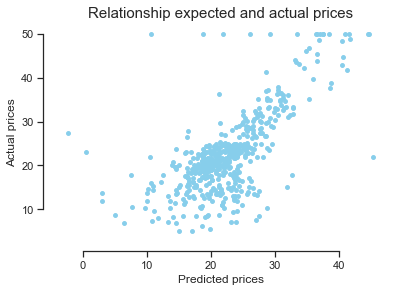

In [31]:
_ = plt.scatter(m.fittedvalues, bos.PRICE, s=15, color='skyblue')
_ = plt.xlabel('Predicted prices')
_ = plt.ylabel('Actual prices')
_ = plt.title("Relationship expected and actual prices", size=15)
_ = sns.despine(offset=10, trim=True)

The result has the same shape that that the scatter plot between `RM` and `PRICE`. Pearson correlation between Predicted prices and `RM` is 1 and it makes sense, because `RM` itself is not a good predictor but is the only variable used to fit the model. The fitting performance could improve to increase the R coefficient and to avoid strong differences between the data observed and expected (perferc fit must be show us something more similar to a straight line).

### Fitting Linear Regression using `sklearn`


In [32]:
from sklearn.linear_model import LinearRegression
X = bos.drop('PRICE', axis = 1)

# This creates a LinearRegression object
lm = LinearRegression()
lm.fit(X, bos.PRICE)
lm.score(X, bos.PRICE)

0.7406426641094095

#### What can you do with a LinearRegression object? 
***
Check out the scikit-learn [docs here](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). We have listed the main functions here. Most machine learning models in scikit-learn follow this same API of fitting a model with `fit`, making predictions with `predict` and the appropriate scoring function `score` for each model.

Main functions | Description
--- | --- 
`lm.fit()` | Fit a linear model
`lm.predit()` | Predict Y using the linear model with estimated coefficients
`lm.score()` | Returns the coefficient of determination (R^2). *A measure of how well observed outcomes are replicated by the model, as the proportion of total variation of outcomes explained by the model*

#### What output can you get?

In [33]:
# Look inside lm object
lm.coef_

array([-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,  2.68673382e+00,
       -1.77666112e+01,  3.80986521e+00,  6.92224640e-04, -1.47556685e+00,
        3.06049479e-01, -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
       -5.24758378e-01])

In [34]:
lm.intercept_

36.45948838509015

Output | Description
--- | --- 
`lm.coef_` | Estimated coefficients
`lm.intercept_` | Estimated intercept 

### Fit a linear model
***

The `lm.fit()` function estimates the coefficients the linear regression using least squares. 

In [35]:
# Use all 13 predictors to fit linear regression model
lm.fit(X, bos.PRICE)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set II</h3>

<p><b>Exercise:</b> How would you change the model to not fit an intercept term? Would you recommend not having an intercept? Why or why not? For more information on why to include or exclude an intercept, look [here](https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faq-what-is-regression-through-the-origin/).</p>

<p><b>Exercise:</b> One of the assumptions of the linear model is that the residuals must be i.i.d. (independently and identically distributed). To satisfy this, is it enough that the residuals are normally distributed? Explain your answer.</p>

<p><b>Exercise:</b> True or false. To use linear regression, $Y$ must be normally distributed. Explain your answer.</p>
</div>


#### Exercise: How would you change the model to not fit an intercept term? Would you recommend not having an intercept? Why or why not? 

In [36]:
m = ols('PRICE ~ ZN + INDUS + CHAS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT',bos).fit()
#m = ols('PRICE ~ ZN + INDUS + CHAS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT - 1',bos).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     113.9
Date:                Sat, 15 Jun 2019   Prob (F-statistic):          1.23e-133
Time:                        16:39:55   Log-Likelihood:                -1504.3
No. Observations:                 506   AIC:                             3035.
Df Residuals:                     493   BIC:                             3090.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     35.3797      5.143      6.879      0.0

In this case it makes sense stars in zero for some variables (the number of rooms per dwelling and taxes) but in the rest variables not. Then, we use a regular linear regression with intercept. After some trials, we note that deleting the intercept R increase, but this R is not comparable to the R of a model with intercept. Statistically we can't compare both R or F statistic and this technique generate a lot of controversy. Literature suggests reject the intercept only when you can assert than the origin is where the regression must start.

#### Exercise: One of the assumptions of the linear model is that the residuals must be i.i.d. (independently and identically distributed). To satisfy this, is it enough that the residuals are normally distributed? Explain your answer.

Residuals are asumming normally distributed, have the same variance and be independent. 

In [37]:
residual = bos.PRICE - m.fittedvalues

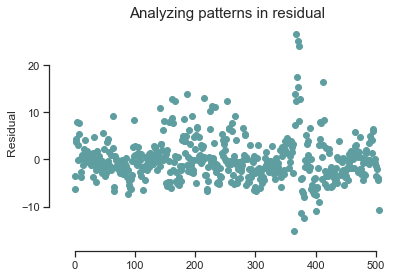

In [38]:
_ = plt.plot(residual, marker='o', color='cadetblue', linestyle='None')
_ = plt.ylabel('Residual')
_ = plt.title("Analyzing patterns in residual", size=15)
_ = sns.despine(offset=10, trim=True)

/Users/daniela/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


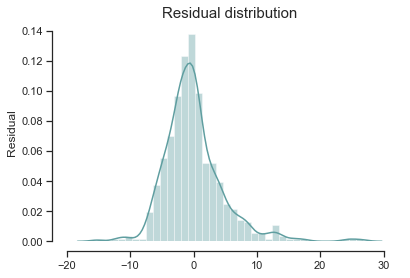

In [39]:
_ = sns.distplot((residual,), color='cadetblue')
_ = plt.ylabel('Residual')
_ = plt.title("Residual distribution", size=15)
_ = sns.despine(offset=10, trim=True)

According to the regression report, we know that skew is positive and kurtosis is more > 0. Taking a look on distribution display, we verify this information. Residual is a leptokurtic distributions. Applying a Shapiro-Wilk test for normality (null hypothesis assume normality):

In [40]:
W, p_value = stats.shapiro(residual)
print('statistic= %.3f, p_value= %.3f' %(W, p_value))
if p_value > 0.05:
    print('Fail to reject the null hypothesis')
else:
    print('Reject the null hypothesis')

statistic= 0.907, p_value= 0.000
Reject the null hypothesis


On one hand, we have a lot of information in the regression report: Onmibus and Jarque Bera are used to test normality. Both probabilites are extremely small, then we definitively can reject the null hypothesis. Durbin Watson check correlation and value measured could indicate a positive correlation. Additionnally, conditional number is warning about multicollinearity or high correlation between two variables (Cond. no. must be <30) and we know that there is correlation between `LSTAT` and `RM` and `LSTAT` and `CRIM` . For another hand, t-statistic of the regression is small (and p_value is too large) for `INDUS` and `AGE`, so model is not fitting well using those variables, and we can reject use them. Confidence interval of the estimated coefficient must be small in suggesting that we are confident about the estimated values, but `NOX` has a huge range. Huge range means imprecise, then we could avoid using `NOX` too.

Must we reject the fitting model? Stadistically, we are not validating the formal statistical inference, but in Data Science, we focus on predictive accuracy. A sanity check that we can do here is review the **heteroskedasticity** of the error:

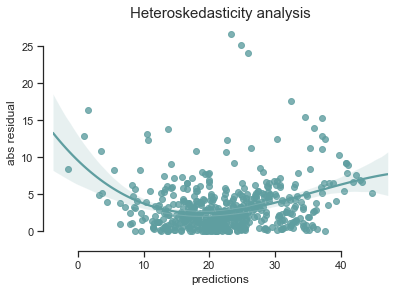

In [41]:
_ = sns.regplot(m.fittedvalues, abs(residual), order=3, color='cadetblue')
_ = plt.ylabel('abs residual')
_ = plt.xlabel('predictions')
_ = plt.title("Heteroskedasticity analysis", size=15)
_ = sns.despine(offset=10, trim=True)

This plot indicates that the model has heteroskedastic errors, because error es greater for some portions. Variance of residuals increase to higher housing prices, but it is also large in the lowest prices. Then, prediction error differs along the range of data and model is incomplete.

#### Exercise: True or false. To use linear regression,  𝑌  must be normally distributed. Explain your answer.

No, the error must be normally distributed. Y depends on X and the error, then Y could not follow a normal distribution

### Estimated intercept and coefficients

Let's look at the estimated coefficients from the linear model using `1m.intercept_` and `lm.coef_`.  

After we have fit our linear regression model using the least squares method, we want to see what are the estimates of our coefficients $\beta_0$, $\beta_1$, ..., $\beta_{13}$: 

$$ \hat{\beta}_0, \hat{\beta}_1, \ldots, \hat{\beta}_{13} $$



In [42]:
print('Estimated intercept coefficient: {}'.format(lm.intercept_))

Estimated intercept coefficient: 36.45948838509015


In [43]:
print('Number of coefficients: {}'.format(len(lm.coef_)))

Number of coefficients: 13


In [44]:
# The coefficients
pd.DataFrame({'features': X.columns, 'estimatedCoefficients': lm.coef_})[['features', 'estimatedCoefficients']]

,features,estimatedCoefficients
0,CRIM,-0.108011
1,ZN,0.046420
2,INDUS,0.020559
3,CHAS,2.686734
4,NOX,-17.766611
5,RM,3.809865
6,AGE,0.000692
7,DIS,-1.475567
8,RAD,0.306049
9,TAX,-0.012335


### Predict Prices 

We can calculate the predicted prices ($\hat{Y}_i$) using `lm.predict`. 

$$ \hat{Y}_i = \hat{\beta}_0 + \hat{\beta}_1 X_1 + \ldots \hat{\beta}_{13} X_{13} $$

In [45]:
# first five predicted prices
lm.predict(X)[0:5]

array([30.00384338, 25.02556238, 30.56759672, 28.60703649, 27.94352423])

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set III</h3>

<p><b>Exercise:</b> Histogram: Plot a histogram of all the predicted prices. Write a story about what you see. Describe the shape, center and spread of the distribution. Are there any outliers? What might be the reason for them? Should we do anything special with them?</p>

<p><b>Exercise:</b> Scatterplot: Let's plot the true prices compared to the predicted prices to see they disagree (we did this with `statsmodels` before).</p>

<p><b>Exercise:</b> We have looked at fitting a linear model in both `statsmodels` and `scikit-learn`. What are the advantages and disadvantages of each based on your exploration? Based on the information provided by both packages, what advantage does `statsmodels` provide?</p>
</div>

#### Exercise: Histogram: Plot a histogram of all the predicted prices. Write a story about what you see. Describe the shape, center and spread of the distribution. Are there any outliers? What might be the reason for them? Should we do anything special with them?

/Users/daniela/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


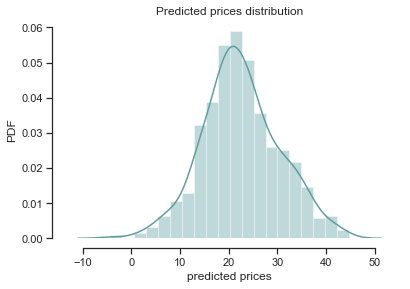

In [46]:
y_predict = lm.predict(X)
_ = sns.distplot((y_predict,), color='cadetblue')
_ = plt.title("Predicted prices distribution")
_ = plt.xlabel("predicted prices")
_ = plt.ylabel("PDF")
_ = sns.despine(offset=10, trim=True)

### How expensive was to have a house in Boston, 1987?

Boston, the city of neighborhoods (around of 23 official subsections), is one of the most dense and oldest cities in U.S, and one of the most important centers of education, innovation and entrepreneurship in the world. The median home value in Boston is $599,000 (https://www.zillow.com/boston-ma/home-values/).

How expensive was in 1987? The following housing prices are a prediction of prices using variables as number of rooms, accesibility to highways, distance to the most popular Boston employment centres, nitrix oxides concentration, crime rate, pupil teacher ratio among others.

Applying a linear regression considering all the variables previoulsly exposed, we got the distribution above. It has a smooth shape, It is not significatively affected by kurtosis and skew. Average housing prices was around 22.500 dollars. Maximum value din't exceed 50.000 dollars and 75% of prices were less than 30.000 dollars. 

In [47]:
print('Location: mean=%.3f, median=%.3f'%(np.mean(y_predict), np.median(y_predict)))
print('Spread: standard deviation= %.3f, min value= %.3f, max value=%.3f, p25=%.3f, p50=%.3f, p75=%.3f' \
       %(np.std(y_predict), 
         np.min(y_predict), \
         np.max(y_predict), \
         np.percentile(y_predict, 25), \
         np.percentile(y_predict, 50), \
         np.percentile(y_predict, 75)
        )
      )

print('Shape: skew=%.3f, kurtosis=%.3f'%(stats.skew(y_predict), stats.kurtosis(y_predict)))

Location: mean=22.533, median=22.119
Spread: standard deviation= 7.907, min value= -4.281, max value=44.673, p25=17.446, p50=22.119, p75=27.410
Shape: skew=0.111, kurtosis=0.103


We use a boxplot to observe outliers:

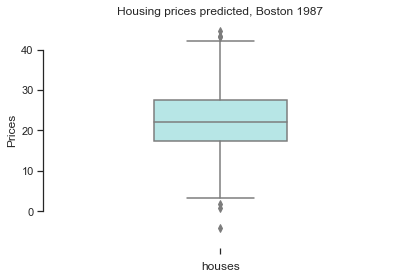

In [48]:
_ = sns.boxplot(y=y_predict, color='paleturquoise', width=0.4)
_ = plt.title("Housing prices predicted, Boston 1987")
_ = plt.xlabel("houses")
_ = plt.ylabel("Prices")
_ = sns.despine(offset=10, trim=True)

We find one value of *z score* > 3

In [49]:
y_predict[(np.abs(stats.zscore(y_predict)) > 3)]

array([-4.28131071])

In [50]:
X[(np.abs(stats.zscore(y_predict)) > 3)]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
414,45.7461,0.0,18.1,0.0,0.693,4.519,100.0,1.6582,24.0,666.0,20.2,88.27,36.98


We know that is an outlier and also the predicted value doesn’t make senses, because the housing prices can't negative. Inspecting the corresponding data, we discover that negative effect is generated by `CRIM`, `NOX`, `DIS`, `PTRATIO` and `LSTAT` and the values of the variables for `CRIM` (> 30) and `LSTAT` (> 30) are outliers. We suspect that we are in front of a influential value. Deleting influential values allows to change the slope of the regression and increasing the R squared, because model fit better to data. If we delete this data of the values used for the model:

In [51]:
bos_less_one = bos[bos.CRIM != 45.7461]
X_opt = bos_less_one.drop('PRICE', axis = 1)
# This creates a LinearRegression object
lm_1 = LinearRegression()
lm_1.fit(X_opt, bos_less_one.PRICE)
observed_score = lm_1.score(X_opt, bos_less_one.PRICE)

In [52]:
score = lm.score(X, bos.PRICE)

In [53]:
delta_score = ((observed_score-score)/score)*100
print('Improvement percentage of R squared= %.3f'%(delta_score))

Improvement percentage of R squared= 0.238


And deleting all the outliers:

In [54]:
z = np.abs(stats.zscore(bos))

In [55]:
bos_df = bos[(z < 3).all(axis=1)]

In [56]:
X_opt = X[(np.abs(stats.zscore(y_predict)) < 3)]
X_opt = bos_df.drop('PRICE', axis = 1)
# This creates a LinearRegression object
lm_2 = LinearRegression()
lm_2.fit(X_opt, bos_df.PRICE)
observed_score = lm_2.score(X_opt, bos_df.PRICE)

In [57]:
delta_score = ((observed_score-score)/score)*100
print('Improvement percentage of R squared= %.3f'%(delta_score))

Improvement percentage of R squared= 0.456


We note an improvement in R squared of 0.24% deleting the point analyzed and 0.456% removing all the outliers. It's a tiny impact and the reason is that we have more influencial values to detect.

#### Exercise: Scatterplot: Let's plot the true prices compared to the predicted prices to see they disagree (we did this with `statsmodels` before).

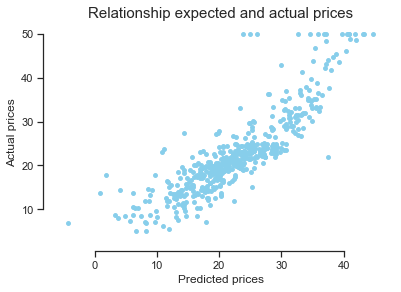

In [58]:
_ = plt.scatter(y_predict, bos.PRICE, s=15, color='skyblue')
_ = plt.xlabel('Predicted prices')
_ = plt.ylabel('Actual prices')
_ = plt.title("Relationship expected and actual prices", size=15)
_ = sns.despine(offset=10, trim=True)

As we can expected, the model fit better (R is more close to 1) but there is some outliers.

#### Exercise: We have looked at fitting a linear model in both `statsmodels` and `scikit-learn`. What are the advantages and disadvantages of each based on your exploration? Based on the information provided by both packages, what advantage does `statsmodels` provide?

Statsmodel is a strong tool to linear regression, because we can deal with categorical variables and delete the intercept easily. Also, we can generate a report that compute the most relevant tests to verify the performance the model, the residual distribution (shape, range and check normal conditions) and correlation and independence between the variables used to fit the model. Report suggest you which variables are better to use in the model with t-test and p value/each variable. A disadvantages is is not completely well documented and supported. Some plots don’t have enough flexibility (they are funtional, but as data science, you are looking for good visualizations too).

scikit-learn is robust, fast, easy to use, comprehensive, and well documented and supported and it is always your first choice in Machine learning, but put less focus on statistics than Statsmodel. You can compute the coefficients for a linear regresion, but you need other libraries to build the statistic tests and get p-values to valide your model.

### Evaluating the Model: Sum-of-Squares

The partitioning of the sum-of-squares shows the variance in the predictions explained by the model and the variance that is attributed to error.

$$TSS = ESS + RSS$$

#### Residual Sum-of-Squares (aka $RSS$)

The residual sum-of-squares is one of the basic ways of quantifying how much error exists in the fitted model. We will revisit this in a bit.

$$ RSS = \sum_{i=1}^N r_i^2 = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

In [59]:
print(np.sum((bos.PRICE - lm.predict(X)) ** 2))

11078.784577954977


#### Explained Sum-of-Squares (aka $ESS$)

The explained sum-of-squares measures the variance explained by the regression model.

$$ESS = \sum_{i=1}^N \left( \hat{y}_i - \bar{y} \right)^2 = \sum_{i=1}^N \left( \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) - \bar{y} \right)^2$$

In [60]:
print(np.sum((lm.predict(X) - np.mean(bos.PRICE)) ** 2))

31637.510837065056


### Evaluating the Model: The Coefficient of Determination ($R^2$)

The coefficient of determination, $R^2$, tells us the percentage of the variance in the response variable $Y$ that can be explained by the linear regression model.

$$ R^2 = \frac{ESS}{TSS} $$

The $R^2$ value is one of the most common metrics that people use in describing the quality of a model, but it is important to note that *$R^2$ increases artificially as a side-effect of increasing the number of independent variables.* While $R^2$ is reported in almost all statistical packages, another metric called the *adjusted $R^2$* is also provided as it takes into account the number of variables in the model, and can sometimes even be used for non-linear regression models!

$$R_{adj}^2 = 1 - \left( 1 - R^2 \right) \frac{N - 1}{N - K - 1} = R^2 - \left( 1 - R^2 \right) \frac{K}{N - K - 1} = 1 - \frac{\frac{RSS}{DF_R}}{\frac{TSS}{DF_T}}$$

where $N$ is the number of observations, $K$ is the number of variables, $DF_R = N - K - 1$ is the degrees of freedom associated with the residual error and $DF_T = N - 1$ is the degrees of the freedom of the total error.

### Evaluating the Model: Mean Squared Error and the $F$-Statistic
***
The mean squared errors are just the *averages* of the sum-of-squares errors over their respective degrees of freedom.

$$MSE = \frac{RSS}{N-K-1}$$

$$MSR = \frac{ESS}{K}$$

**Remember:** Notation may vary across resources particularly the use of $R$ and $E$ in $RSS/ESS$ and $MSR/MSE$. In some resources, E = explained and R = residual. In other resources, E = error and R = regression (explained). **This is a very important distinction that requires looking at the formula to determine which naming scheme is being used.**

Given the MSR and MSE, we can now determine whether or not the entire model we just fit is even statistically significant. We use an $F$-test for this. The null hypothesis is that all of the $\beta$ coefficients are zero, that is, none of them have any effect on $Y$. The alternative is that *at least one* $\beta$ coefficient is nonzero, but it doesn't tell us which one in a multiple regression:

$$H_0: \beta_i = 0, \mbox{for all $i$} \\
H_A: \beta_i > 0, \mbox{for some $i$}$$ 

$$F = \frac{MSR}{MSE} = \left( \frac{R^2}{1 - R^2} \right) \left( \frac{N - K - 1}{K} \right)$$
 
Once we compute the $F$-statistic, we can use the $F$-distribution with $N-K$ and $K-1$ degrees of degrees of freedom to get a p-value.

**Warning!** The $F$-statistic mentioned in this section is NOT the same as the F1-measure or F1-value discused in Unit 7.

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set IV</h3>

<p>Let's look at the relationship between `PTRATIO` and housing price.</p>

<p><b>Exercise:</b> Try fitting a linear regression model using only the 'PTRATIO' (pupil-teacher ratio by town) and interpret the intercept and the coefficients.</p>

<p><b>Exercise:</b> Calculate (or extract) the $R^2$ value. What does it tell you?</p>

<p><b>Exercise:</b> Compute the $F$-statistic. What does it tell you?</p>

<p><b>Exercise:</b> Take a close look at the $F$-statistic and the $t$-statistic for the regression coefficient. What relationship do you notice? Note that this relationship only applies in *simple* linear regression models.</p>
</div>

#### Exercise: Try fitting a linear regression model using only the 'PTRATIO' (pupil-teacher ratio by town) and interpret the intercept and the coefficien


In [61]:
m = ols('PRICE ~ PTRATIO',bos).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     175.1
Date:                Sat, 15 Jun 2019   Prob (F-statistic):           1.61e-34
Time:                        16:39:56   Log-Likelihood:                -1764.8
No. Observations:                 506   AIC:                             3534.
Df Residuals:                     504   BIC:                             3542.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     62.3446      3.029     20.581      0.0

One increase in the pupil-teacher ratio decreace the housing price in 2.1572 thousands of dollars and the price for a ratio of zero is 62.3446 dollars. The model is not fitting very well, as we can note looking the Omnibus and Jarque-Bera tests, that use the skew and kurtosis to determine normality on residuals. Both probabilites are null and extremely small, respectively. R squared (adj) of 0.256 suggests a poor performance of the model. 

Residual distribution is positive skewed and kurtosis is positive, then distribution is leptokurtic.

175.1 is the F statistic and corresponds to t-statistic squared (slope of the regression). To get the p_value we use the F -distribution with N-K and K-1 degreees of freedom, where K is number of variables (2 in this case) and N is the number of observations, 506.

We calculate the critical value to compare with the F-statistic. If F-statistic is greater than the critical value is equivalent to a p-value less than alpha then we can reject the null hypothesis. In this case, we reject the null hypothesis.

In [62]:
import scipy.stats
F_crit = scipy.stats.f.ppf(q=1-0.05, dfn=1, dfd=504)
F_statistic = 175.1

#stats.f.cdf(crit, dfn=1, dfd=505)
if F_statistic > F_crit:
    print('Reject the null hypothesis')
else:
    print('Fail to reject the null hypothesis')

Reject the null hypothesis


<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set V</h3>

<p>Fit a linear regression model using three independent variables</p>

<ol>
<li> 'CRIM' (per capita crime rate by town)
<li> 'RM' (average number of rooms per dwelling)
<li> 'PTRATIO' (pupil-teacher ratio by town)
</ol>

<p><b>Exercise:</b> Compute or extract the $F$-statistic. What does it tell you about the model?</p>

<p><b>Exercise:</b> Compute or extract the $R^2$ statistic. What does it tell you about the model?</p>

<p><b>Exercise:</b> Which variables in the model are significant in predicting house price? Write a story that interprets the coefficients.</p>
</div>

#### Exercise: Compute or extract the $R^2$ and   𝐹 -statistic. What does it tell you about the model? Which variables in the model are significant in predicting house price? Write a story that interprets the coefficients

In [63]:
X1 = bos[['PTRATIO','CRIM','RM']]
lm_1 = LinearRegression()
lm_1.fit(X1, bos.PRICE)
scores = lm_1.score(X1, bos.PRICE)

# The coefficients
pd.DataFrame({'features': ['PTRATIO','CRIM','RM'], 'estimatedCoefficients': lm_1.coef_})\
[['features', 'estimatedCoefficients']]

,features,estimatedCoefficients
0,PTRATIO,-1.069546
1,CRIM,-0.204961
2,RM,7.380411


In [64]:
def R_squares(predicted, observed):
    ESS = np.sum((predicted-np.mean(observed)) ** 2)
    RSS = np.sum((observed - predicted) ** 2)
    TSS = ESS + RSS
    return ESS/TSS

In [65]:
def F_statistic(R, N, K):
    return (R/(1 - R))*((N - K - 1)/K)

In [66]:
R_sq = (R_squares(lm_1.predict(X1), bos.PRICE))
print(R_sq)

0.5943412940723473


In [67]:
N = X1.shape[0]
K = X1.shape[1] + 1
F_stat = F_statistic(R_sq, N, K)
print(F_stat)

183.50708611646988


In [68]:
m = ols('PRICE ~ RM + PTRATIO + CRIM',bos).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     245.2
Date:                Sat, 15 Jun 2019   Prob (F-statistic):           6.15e-98
Time:                        16:39:56   Log-Likelihood:                -1612.0
No. Observations:                 506   AIC:                             3232.
Df Residuals:                     502   BIC:                             3249.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.3707      4.034     -0.836      0.4

R squared has improved respect to the previous model, but it could be better. F_stat is huge and the probability of all coefficients $B_i$ is very small, then we conclude that at least one of them is not null (alternative hypothesis).

Distribution of residuals this time increases the kurtosis and still being positive skewed. Conditional number suggest possible multi-correlation between the independen variables and Omnibus (conditional number > 30) and Jarque-Bera test say that variables don't distribute normally. Additionally, Durbin-Watson is less than 1, suggesting a smooth positive correlation between the variables. We use a regression with intercept because we have some variables whose doesnt't makes sense begin the housing prices in the origin (crime rate, for example). 

Most significance variables are `PTRATIO` and `RM`: if you increase the pupil-teacher ratio in one (keeping the another variables), price of houses decrease on 1.069 thousand of dollars and if you increase the number of rooms per dwelling in one (keeping all the another variables), housing prices increments on 7.38 thousand of dollars.

## Part 4: Comparing Models

During modeling, there will be times when we want to compare models to see which one is more predictive or fits the data better. There are many ways to compare models, but we will focus on two.

### The $F$-Statistic Revisited

The $F$-statistic can also be used to compare two *nested* models, that is, two models trained on the same dataset where one of the models contains a *subset* of the variables of the other model. The *full* model contains $K$ variables and the *reduced* model contains a subset of these $K$ variables. This allows us to add additional variables to a base model and then test if adding the variables helped the model fit.

$$F = \frac{\left( \frac{RSS_{reduced} - RSS_{full}}{DF_{reduced} - DF_{full}} \right)}{\left( \frac{RSS_{full}}{DF_{full}} \right)}$$

where $DF_x = N - K_x - 1$ where $K_x$ is the number of variables in model $x$.

### Akaike Information Criterion (AIC)

Another statistic for comparing two models is AIC, which is based on the likelihood function and takes into account the number of variables in the model.

$$AIC = 2 K - 2 \log_e{L}$$

where $L$ is the likelihood of the model. AIC is meaningless in the absolute sense, and is only meaningful when compared to AIC values from other models. Lower values of AIC indicate better fitting models.

`statsmodels` provides the AIC in its output.

<div class="span5 alert alert-info">
<h3>Part 4 Checkup Exercises</h3>

<p><b>Exercise:</b> Find another variable (or two) to add to the model we built in Part 3. Compute the $F$-test comparing the two models as well as the AIC. Which model is better?</p>
</div>

In [69]:
def DFx(X):
    N = X.shape[0]
    K = X.shape[1] + 1
    return N - K - 1

In [70]:
def F_nested_models(X_full, X_red, predicted_full, predicted_red, observed):
    RSS_red = np.sum((observed - predicted_red) ** 2)
    RSS_full = np.sum((observed - predicted_full) ** 2)
    DF_red = DFx(X_red)
    DF_full = DFx(X_full)
    F = ((RSS_red - RSS_full)/(DF_red - DF_full))/(RSS_full/DF_full)
    return F

Inspecting the coefficients for all the independent variables when we included all of them in the model, we suspect that `CHAS`, `RAD`, `DIS` and `ZN` could improve the actual model. Other possibilities are `TAX` and `RAD` because it makes sense that they have some relation with the prices. After testing all of them, we chose `TAX` and `RAD` because they seem to increase the performance:

In [71]:
X2 = bos[['PTRATIO','CRIM','RM', 'TAX', 'RAD']]
lm_2 = LinearRegression()
lm_2.fit(X2, bos.PRICE)
scores = lm_2.score(X2, bos.PRICE)

In [72]:
F_stat = F_nested_models(X2, X1, lm_2.predict(X2), lm_1.predict(X1), bos.PRICE)

In [73]:
alpha = 0.05
N = X2.shape[0]
K = X2.shape[1] + 1
p_value = stats.f.cdf(F_stat, 5, 500)
if p_value > alpha:
    print('Reject the null hypothesis')
else:
    print('Fail to reject the null hypothesis')

Reject the null hypothesis


And we verify that both variables improve the model:

In [74]:
R_sq = (R_squares(lm_2.predict(X2), bos.PRICE))
print(R_sq)

0.6131497380144635


In [75]:
m2 = ols('PRICE ~ RM + PTRATIO + CRIM  + TAX + RAD',bos).fit()
print(m2.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     158.5
Date:                Sat, 15 Jun 2019   Prob (F-statistic):          1.11e-100
Time:                        16:39:56   Log-Likelihood:                -1600.0
No. Observations:                 506   AIC:                             3212.
Df Residuals:                     500   BIC:                             3237.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.4625      4.256      0.579      0.5

AIC using 3 variables is 3232 and using 4 is 2765. Then $AIC_5$ < $AIC_3$ and new model fits better. But now, we have strong correlation between some variables.


## Part 5: Evaluating the Model via Model Assumptions and Other Issues
***
Linear regression makes several assumptions. It is always best to check that these assumptions are valid after fitting a linear regression model.

<div class="span5 alert alert-danger">
<ul>
  <li>**Linearity**. The dependent variable $Y$ is a linear combination of the regression coefficients and the independent variables $X$. This can be verified with a scatterplot of each $X$ vs. $Y$ and plotting correlations among $X$. Nonlinearity can sometimes be resolved by [transforming](https://onlinecourses.science.psu.edu/stat501/node/318) one or more independent variables, the dependent variable, or both. In other cases, a [generalized linear model](https://en.wikipedia.org/wiki/Generalized_linear_model) or a [nonlinear model](https://en.wikipedia.org/wiki/Nonlinear_regression) may be warranted.</li>
  <li>**Constant standard deviation**. The SD of the dependent variable $Y$ should be constant for different values of X. We can check this by plotting each $X$ against $Y$ and verifying that there is no "funnel" shape showing data points fanning out as $X$ increases or decreases. Some techniques for dealing with non-constant variance include weighted least squares (WLS), [robust standard errors](https://en.wikipedia.org/wiki/Heteroscedasticity-consistent_standard_errors), or variance stabilizing transformations.
    </li>
  <li> **Normal distribution for errors**.  The $\epsilon$ term we discussed at the beginning are assumed to be normally distributed. This can be verified with a fitted values vs. residuals plot and verifying that there is no pattern, and with a quantile plot.
  $$ \epsilon_i \sim N(0, \sigma^2)$$
Sometimes the distributions of responses $Y$ may not be normally distributed at any given value of $X$.  e.g. skewed positively or negatively. </li>
<li> **Independent errors**.  The observations are assumed to be obtained independently.
    <ul>
        <li>e.g. Observations across time may be correlated
    </ul>
</li>
</ul>  

</div>

There are some other issues that are important investigate with linear regression models.

<div class="span5 alert alert-danger">
<ul>
  <li>**Correlated Predictors:** Care should be taken to make sure that the independent variables in a regression model are not too highly correlated. Correlated predictors typically do not majorly affect prediction, but do inflate standard errors of coefficients making interpretation unreliable. Common solutions are dropping the least important variables involved in the correlations, using regularlization, or, when many predictors are highly correlated, considering a dimension reduction technique such as principal component analysis (PCA).
  <li>**Influential Points:** Data points that have undue influence on the regression model. These points can be high leverage points or outliers. Such points are typically removed and the regression model rerun.
</ul>
</div>


<div class="span5 alert alert-info">
<h3>Part 5 Checkup Exercises</h3>

<p>Take the reduced model from Part 3 to answer the following exercises. Take a look at [this blog post](http://mpastell.com/2013/04/19/python_regression/) for more information on using statsmodels to construct these plots.</p>
    
<p><b>Exercise:</b> Construct a fitted values versus residuals plot. What does the plot tell you? Are there any violations of the model assumptions?</p>

<p><b>Exercise:</b> Construct a quantile plot of the residuals. What does the plot tell you?</p>

<p><b>Exercise:</b> What are some advantages and disadvantages of the fitted vs. residual and quantile plot compared to each other?</p>

<p><b>Exercise:</b> Identify any outliers (if any) in your model and write a story describing what these outliers might represent.</p>

<p><b>Exercise:</b> Construct a leverage plot and identify high leverage points in the model. Write a story explaining possible reasons for the high leverage points.</p>

<p><b>Exercise:</b> Remove the outliers and high leverage points from your model and run the regression again. How do the results change?</p>
</div>

#### Exercise: Construct a fitted values versus residuals plot. What does the plot tell you? Are there any violations of the model assumptions?


/Users/daniela/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


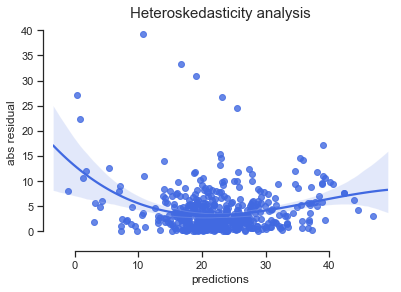

In [76]:
residual = bos.PRICE - lm_1.predict(X1)
_ = sns.regplot(lm_1.predict(X1), abs(residual), order=3, color='royalblue')
_ = plt.ylabel('abs residual')
_ = plt.xlabel('predictions')
_ = plt.title("Heteroskedasticity analysis", size=15)
_ = sns.despine(offset=10, trim=True)

As we mentioned early, the heteroskedasticity analysis allow us to know if residuals follow some pattern. Here, we see that they are not constant; again, model has heteroskedastic errors, because error es greater for some portions. Variance of residuals increases in higher housing prices, but it is also large in the lowest prices. Then, prediction error differs along the range of data and model could be improved.

#### Exercise: Construct a quantile plot of the residuals. What does the plot tell you?

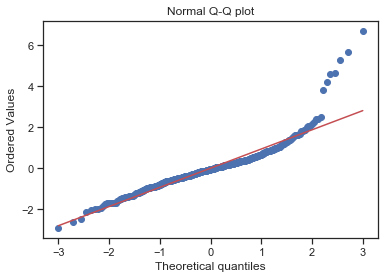

In [77]:
z = (residual-np.mean(residual))/np.std(residual)
_ = stats.probplot(z, dist="norm", plot=plt)
_ = plt.title("Normal Q-Q plot")
plt.show()

We identify some outliers that don't allow that resisuals fit completely well to a normal distribution.

#### Exercise: What are some advantages and disadvantages of the fitted vs. residual and quantile plot compared to each other?

Is data was normal, centrered in zero and with a standard deviation of 1, 68.27% must be are between -1 and 1. We know that data beyond two standard deviation don't fit well to a normal distribution and particularly, on the right tail. This plot shows immediately if distribution of data (residuals in this case) is normal or no.

Advantages of quantile plot: Many distributional aspects can be simultaneously tested. For example, shifts in location, shifts in scale, changes in symmetry, and the presence of outliers can all be detected from this plot. 

Using a scatter plot of fitted vs. residual we can see the behavior of the residual variance along of the predictions and indentify in which portions of the range of housing prices variance is less homogeneous (lower and highest valued homes)

#### Exercise: Identify any outliers (if any) in your model and write a story describing what these outliers might represent.

In regression, outlier is a record whose actual value is distant from the predicted value. We use boxplot to visualize outliers and z score to identify them:

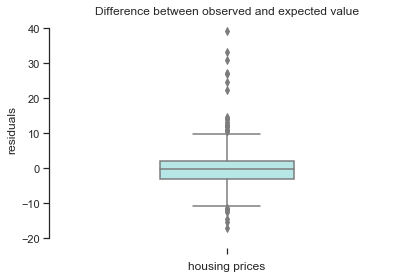

In [78]:
_ = sns.boxplot(y=residual, color='paleturquoise', width=0.4)
_ = plt.title("Difference between observed and expected value")
_ = plt.xlabel("housing prices")
_ = plt.ylabel("residuals")
_ = sns.despine(offset=10, trim=True)

In [79]:
z = np.abs(stats.zscore(residual))
outliers = X1[(np.abs(z) > 3)]
print("Printing value of the independent variables:") 
print (outliers)

outliers1 = bos.PRICE[(np.abs(z) > 3)]
print("Printing value of housing prices: ")
print(outliers1)

outliers2 = residual[(np.abs(z) > 3)]
print("Residual outliers: ")
print(outliers2)

Printing value of the independent variables:
     PTRATIO      CRIM     RM
365     20.2   4.55587  3.561
367     20.2  13.52220  3.863
368     20.2   4.89822  4.970
369     20.2   5.66998  6.683
370     20.2   6.53876  7.016
371     20.2   9.23230  6.216
372     20.2   8.26725  5.875
Printing value of housing prices: 
365    27.5
367    23.1
368    50.0
369    50.0
370    50.0
371    50.0
372    50.0
Name: PRICE, dtype: float64
Residual outliers: 
365    27.127667
367    22.336529
368    39.298836
369    26.814372
370    24.534761
371    30.991160
372    33.310083
Name: PRICE, dtype: float64


We can see that the values of the independent variables are in normal ranges, but almost all housing prices are in the right left of the distribution (the highest values), being outliers of the data themselves. If we delete this housing prices before try to fit the model, we could improve the results.

#### Exercise: Construct a leverage plot and identify high leverage points in the model. Write a story explaining possible reasons for the high leverage points.

In [80]:
from statsmodels.graphics.regressionplots import *

In [81]:
m = ols('PRICE ~ PTRATIO + RM + CRIM',bos).fit()

In [82]:
influence = m.get_influence()
(c, p) = influence.cooks_distance

residual = bos.PRICE - lm_1.predict(X1)
std_residual = residual/np.std(residual)
df_influential = pd.DataFrame({'PTRATIO': bos.PTRATIO, 'RM': bos.RM, \
                               'CRIM': bos.CRIM,'c': c, 'p': p, \
                               'Y': bos.PRICE, 'Y expected':lm_1.predict(X1), \
                               'std residual': std_residual})


Here we show a standardized residual adding Cook's distance as size of circles in the scatterplot. Cook's distance define the influence as a combination of leverage and residual size. Biggest point on the plot represent large influence in the regression.

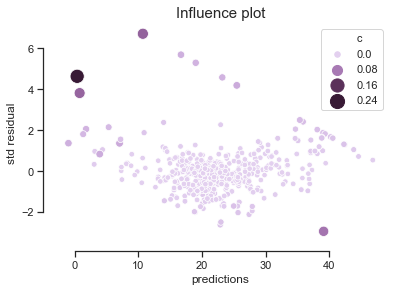

In [83]:
cmap = sns.cubehelix_palette(start=.5, rot=-.10, as_cmap=True)
_ = sns.scatterplot(x='Y expected', y='std residual', size='c',  
                    hue='c', sizes=(30, 200), \
                    palette=cmap, data=df_influential)
_ = plt.xlabel('predictions')
_ = plt.ylabel('std residual')
_ = plt.title("Influence plot", size=15)
_ = sns.despine(offset=10, trim=True)

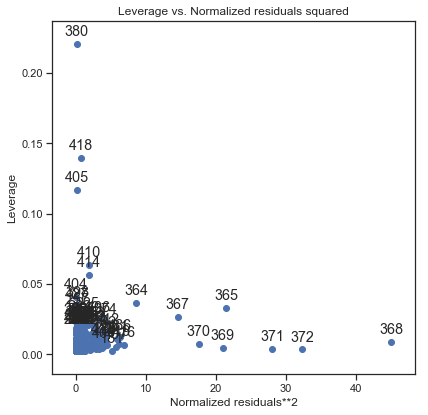

In [84]:
fig, ax = plt.subplots(figsize=(6.5, 6.5))
fig = sm.graphics.plot_leverage_resid2(m, ax=ax)

And now we can confirm that point 414 was an oultier and a high influential value! Some of the residual outliers found in the previus exercise appear as hight leverage too. Influential values are out of the cloud near to the origin and as we said before, this points have some atypical values on the independent variables used to train the model or the price observed represent an outlier itself.

#### Exercise: Remove the outliers and high leverage points from your model and run the regression again. How do the results change?

In [85]:
inds = [380, 418, 405, 414, 364, 367, 370, 365, 369, 371, 372, 368]

In [86]:
bos_less_leverage = bos.drop(inds)

In [87]:
m_less_leverage = ols('PRICE ~ PTRATIO + RM + CRIM', bos_less_leverage).fit()
print(m_less_leverage.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     436.5
Date:                Sat, 15 Jun 2019   Prob (F-statistic):          5.91e-138
Time:                        16:39:57   Log-Likelihood:                -1452.5
No. Observations:                 494   AIC:                             2913.
Df Residuals:                     490   BIC:                             2930.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -9.0397      3.285     -2.751      0.0

p-value of t test indicate that all variables are relevant in the model. Residuals have a positive correlation (Durbin Watson more than 1), Omnibus and Jarque-Bera probabilities suggest that residuals don’t follow a normal distribution. Residual distribution this has a slightly positive skew, but less than before and kurtosis still the same. F-statistic is huge and probability of null coefficients for the variables is insignificant, then we reject the null hypothesis. AIC decreace from 3232 to 2913 to confirm and R adjusted increace from 0.592 to 0.726. We improve the performance of the model deleting oultiers and high leverages points. 